# Fysikklab TFY4106 og TFY4125 våren 2023.

Denne notebooken genererer en berg-og-dal-bane basert på koordinatene til åtte festepunkter med tildels 
tilfeldig valgte høyder. Baneformen $y(x)$ beregnes med funksjonen __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ består av ulike tredjegradspolynomer på deler av et intervall $[a,b]$, slik at $S$, $S' = dS/dx$ og $S'' = d^2S/dx^2$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

Dere skal deretter studere bevegelsen til ei lita kule som ruller på den genererte banen $y(x)$.
Dette blir temmelig enkelt ettersom kulas mekaniske energi (dvs summen av kinetisk og potensiell energi) er bevart 
når den ruller rent (dvs uten å gli). 

Skruehøydene genereres innenfor visse rammer som sørger for at 
<li> kula kommer seg gjennom hele banen, </li> 
<li> banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>
    
Det holder å kjøre dette programmet en gang for å oppnå en tilfredsstillende bane.
Når dere har gjort dette, er det viktig at dere skriver ned koordinatene til festepunktene! 
Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk på neste labøkt. Derfor er det viktig å notere nødvendig informasjon.
    

Vi begynner med å importere noen nyttige bibliotek:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene. 
Horisontal avstand mellom festepunktene er 200 mm.

In [2]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm 
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [3]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

Vi lager deretter en array med høydekoordinatene til festepunktene. 
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [4]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = yfast[0] - np.random.randint(40,60)      # 249
yfast[2] = yfast[1] - np.random.randint(70,90)      # 169
yfast[3] = yfast[2] + np.random.randint(-30,10)     # 146
yfast[4] = yfast[3] + np.random.randint(30,70)      # 189
yfast[5] = yfast[4] + np.random.randint(-20,20)     # 195
yfast[6] = yfast[5] - np.random.randint(40,80)      # 154
yfast[7] = yfast[6] + np.random.randint(-40,40)     # 191

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [5]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [6]:
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Nå kan vi plotte baneformen $y(x)$

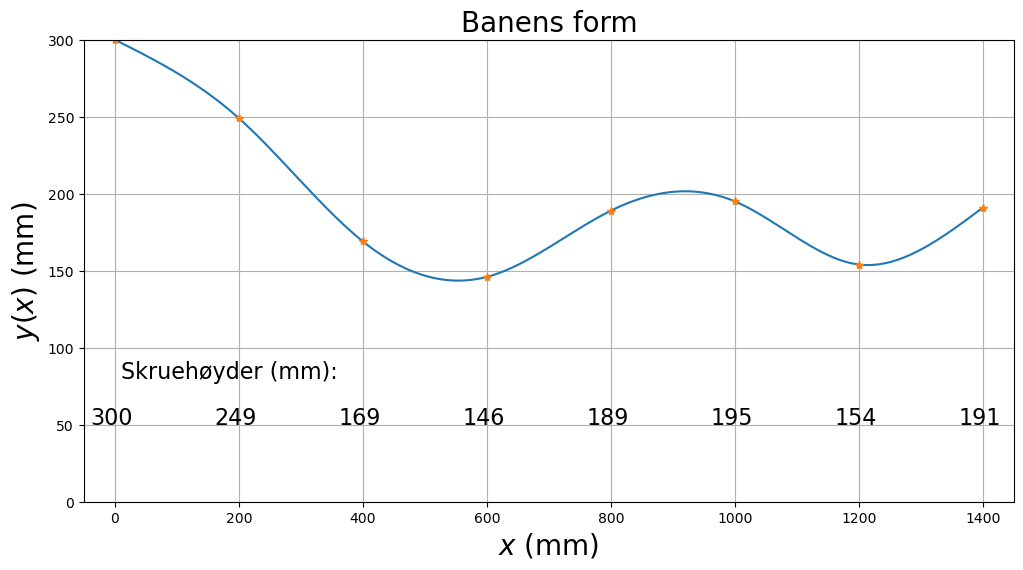

In [40]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()
#Ta bort # hvis du ønsker å lagre grafen som pdf og/eller png.
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')

La oss til slutt foreta noen beregninger basert på banens form og skrive ut
noen størrelser, som en kontroll på at banen tilfredsstiller kriteriene som nevnes ovenfor. Du finner selv ut hva de beregnede størrelsene representerer.

In [41]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Høyeste punkt etter 3.skrue (mm):  202
Laveste punkt etter 2.skrue (mm):  144
Starthelningsvinkel (grader): -11.4
Maksimal helningsvinkel (grader): 23.3
Minste krumningsradius (mm):  287
Festepunkthøyder (mm): [300. 249. 169. 146. 189. 195. 154. 191.]


In [42]:
g = 9.81

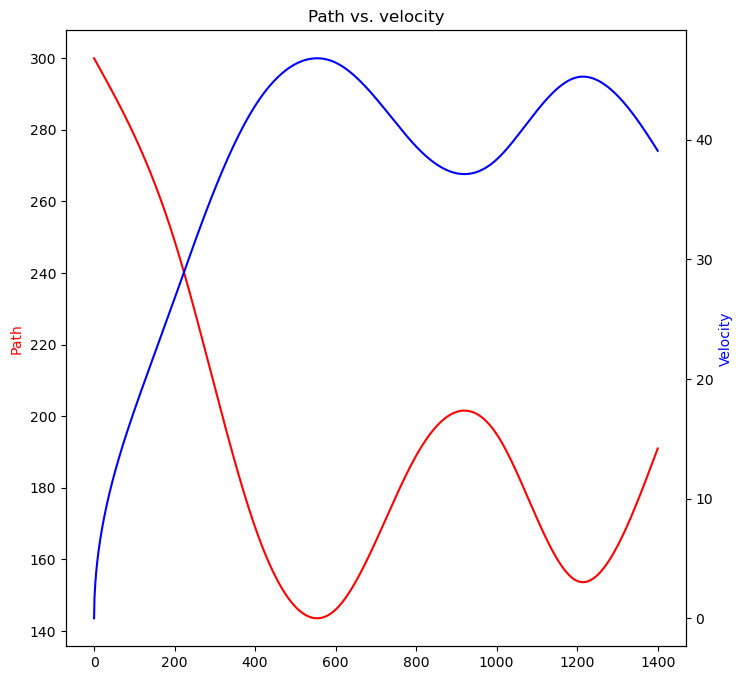

In [49]:
vel = [np.sqrt(10/7 * g * (y[0] - y[x])) for x in range(len(y))]

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, y, color="red")
ax2.plot(x, vel, color="blue")

ax1.set_ylabel("Path", color="red")
ax2.set_ylabel("Velocity", color="blue")
plt.title("Path vs. velocity");

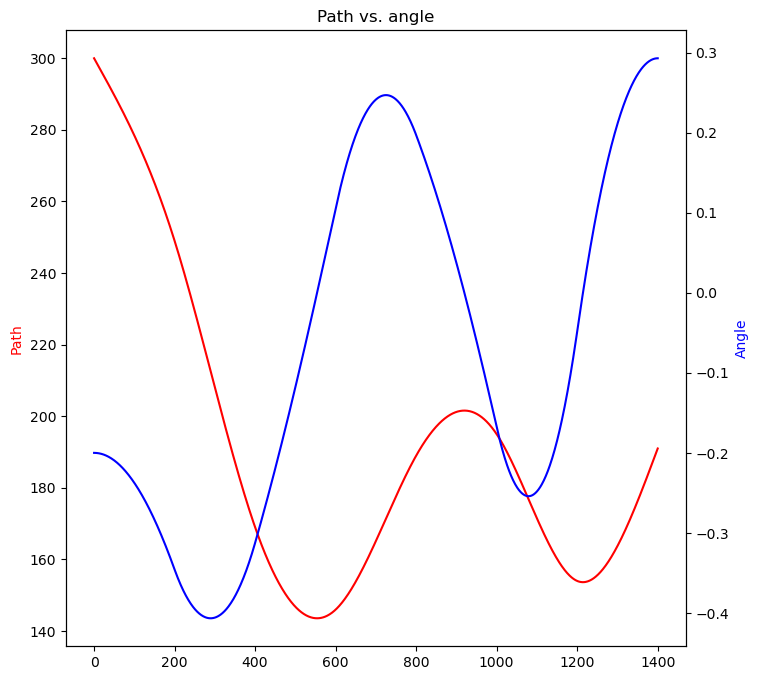

In [57]:
beta = [np.arctan(x) for x in dy]

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, y, color="red")
ax2.plot(x, beta, color="blue")

ax1.set_ylabel("Path", color="red")
ax2.set_ylabel("Angle", color="blue")
plt.title("Path vs. angle");

In [65]:
x_vel = [v * np.cos(b) for v, b in zip(vel, beta)]

In [66]:
x_avg_vel = [(x_vel[i-1] + x_vel[i])/2 for i in range(1, len(x_vel))]

In [67]:
delta_t = [1/x for x in x_avg_vel]

In [69]:
time = np.cumsum(delta_t)

In [71]:
time = np.insert(time, 0, 0, axis=0)

In [75]:
time

array([ 0.        ,  1.21123358,  1.71294077, ..., 47.08203341,
       47.10870193, 47.1354074 ])

In [76]:
curvature = d2y / np.power((1 + np.power(dy, 2)), 3/2)

In [84]:
sentripetal_acceleration = np.multiply(np.power(np.array(vel), 2), curvature)

In [98]:
M = 31
c = 2/5

normal_force = M * (g * np.cos(np.array(beta)) + sentripetal_acceleration)

In [91]:
path_acceleration = - (5*g*np.sin(np.array(beta))/7)

In [93]:
friction = c / (1+c) * M*g*np.sin(np.array(beta))

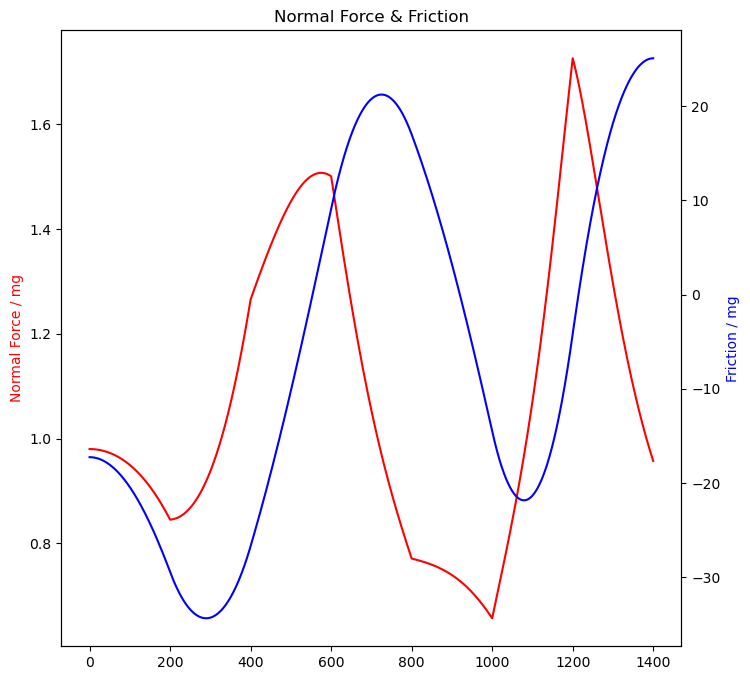

In [101]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, normal_force / (M*g), color="red")
ax2.plot(x, friction, color="blue")

ax1.set_ylabel("Normal Force / mg", color="red")
ax2.set_ylabel("Friction / mg", color="blue")
plt.title("Normal Force & Friction");

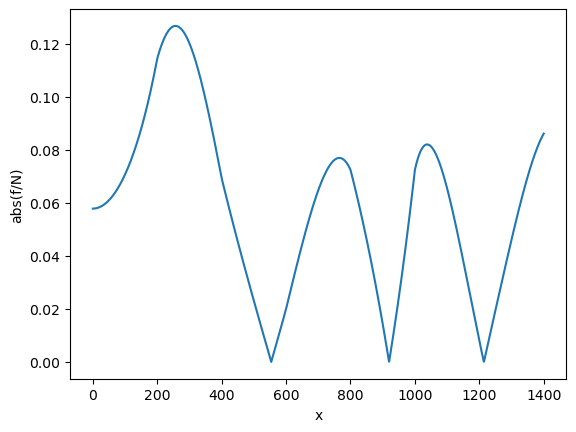

In [104]:
plt.plot(x, np.abs(friction / normal_force))
plt.title("")
plt.ylabel("abs(f/N)")
plt.xlabel("x");

# (4) End velocity in experiment

In [29]:
def read_time_and_x(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        third_last_line = lines[-3].strip()
        last_line = lines[-1].strip()

    third_last_words = third_last_line.split(";")
    last_words = last_line.split(";")

    third_last_time = third_last_words[0]
    third_last_x = third_last_words[1]

    last_time = last_words[0]
    last_x = last_words[1]

    return third_last_time, third_last_x, last_time, last_x

def get_end_velocity(file_path):
    time_before, time_after, pos_before, pos_after = read_time_and_x(file_path)
    return (float(pos_after) - float(pos_before)) / (float(time_after) - float(time_before))

print("End_velocity_1: " + str(get_end_velocity("kule_1_data.txt")) + " m/s")
print("End_velocity_2: " + str(get_end_velocity("kule_2_data.txt")) + " m/s")
print("End_velocity_3: " + str(get_end_velocity("kule_3_data.txt")) + " m/s")
print("End_velocity_4: " + str(get_end_velocity("kule_4_data.txt")) + " m/s")
print("End_velocity_5: " + str(get_end_velocity("kule_5_data.txt")) + " m/s")
print("End_velocity_6: " + str(get_end_velocity("kule_6_data.txt")) + " m/s")
print("End_velocity_7: " + str(get_end_velocity("kule_7_data.txt")) + " m/s")
print("End_velocity_8: " + str(get_end_velocity("kule_8_data.txt")) + " m/s")
print("End_velocity_9: " + str(get_end_velocity("kule_9_data.txt")) + " m/s")
print("End_velocity_10: " + str(get_end_velocity("kule_10_data.txt")) + " m/s")

End_velocity_1: 1.0521828037458145 m/s
End_velocity_2: 1.113200539265251 m/s
End_velocity_3: 1.0478858229739323 m/s
End_velocity_4: 1.049473307392996 m/s
End_velocity_5: 1.0426105536351533 m/s
End_velocity_6: 1.0513494126859828 m/s
End_velocity_7: 1.0471830059890261 m/s
End_velocity_8: 1.053467136477878 m/s
End_velocity_9: 1.0519348284969618 m/s
End_velocity_10: 1.0532180112163678 m/s


# End value of the ball's total kinetic energy, K

We assume 0-level is at ??

In [30]:
m = 0.0305
K_tot_1 = 0.5 * m * get_end_velocity("kule_1_data.txt")
K_tot_2 = 0.5 * m * get_end_velocity("kule_2_data.txt")
K_tot_3 = 0.5 * m * get_end_velocity("kule_3_data.txt")
K_tot_4 = 0.5 * m * get_end_velocity("kule_4_data.txt")
K_tot_5 = 0.5 * m * get_end_velocity("kule_5_data.txt")
K_tot_6 = 0.5 * m * get_end_velocity("kule_6_data.txt")
K_tot_7 = 0.5 * m * get_end_velocity("kule_7_data.txt")
K_tot_8 = 0.5 * m * get_end_velocity("kule_8_data.txt")
K_tot_9 = 0.5 * m * get_end_velocity("kule_9_data.txt")
K_tot_10 = 0.5 * m * get_end_velocity("kule_10_data.txt")

print("Total_Kinetic_Energy_1: " + str(K_tot_1) + " N")
print("Total_Kinetic_Energy_2: " + str(K_tot_2) + " N")
print("Total_Kinetic_Energy_3: " + str(K_tot_3) + " N")
print("Total_Kinetic_Energy_4: " + str(K_tot_4) + " N")
print("Total_Kinetic_Energy_5: " + str(K_tot_5) + " N")
print("Total_Kinetic_Energy_6: " + str(K_tot_6) + " N")
print("Total_Kinetic_Energy_7: " + str(K_tot_7) + " N")
print("Total_Kinetic_Energy_8: " + str(K_tot_8) + " N")
print("Total_Kinetic_Energy_9: " + str(K_tot_9) + " N")
print("Total_Kinetic_Energy_10: " + str(K_tot_10) + " N")

Total_Kinetic_Energy_1: 0.01604578775712367 N
Total_Kinetic_Energy_2: 0.01697630822379508 N
Total_Kinetic_Energy_3: 0.015980258800352466 N
Total_Kinetic_Energy_4: 0.01600446793774319 N
Total_Kinetic_Energy_5: 0.015899810942936087 N
Total_Kinetic_Energy_6: 0.016033078543461237 N
Total_Kinetic_Energy_7: 0.015969540841332647 N
Total_Kinetic_Energy_8: 0.01606537383128764 N
Total_Kinetic_Energy_9: 0.01604200613457867 N
Total_Kinetic_Energy_10: 0.01606157467104961 N


# Lost mecanic energy, delta E

In [31]:
def read_y(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        first_line = lines[2].strip()
        last_line = lines[-1].strip()

    first_words = first_line.split(";")
    last_words = last_line.split(";")

    first_y = first_words[2]
    last_y = last_words[2]

    return first_y, last_y

def get_delta_e(file_path):
    y_0, y_7 = read_y(file_path)
    v = get_end_velocity(file_path)
    delta_e = 0.022 * ( 9.81 * (float(y_0) - float(y_7)) - 0.5 * v**2)
    return delta_e

print("Delta_e_1: " + str(get_delta_e("kule_1_data.txt")))
print("Delta_e_2: " + str(get_delta_e("kule_2_data.txt")))
print("Delta_e_3: " + str(get_delta_e("kule_3_data.txt")))
print("Delta_e_4: " + str(get_delta_e("kule_4_data.txt")))
print("Delta_e_5: " + str(get_delta_e("kule_5_data.txt")))
print("Delta_e_6: " + str(get_delta_e("kule_6_data.txt")))
print("Delta_e_7: " + str(get_delta_e("kule_7_data.txt")))
print("Delta_e_8: " + str(get_delta_e("kule_8_data.txt")))
print("Delta_e_9: " + str(get_delta_e("kule_9_data.txt")))
print("Delta_e_10: " + str(get_delta_e("kule_10_data.txt")))


Delta_e_1: 47.29556602482251
Delta_e_2: 42.52449063015318
Delta_e_3: 37.19528928832212
Delta_e_4: 40.66995466354778
Delta_e_5: 32.16680459556794
Delta_e_6: 38.85702330853689
Delta_e_7: 38.295987485271645
Delta_e_8: 41.83529027691598
Delta_e_9: 43.367647764282545
Delta_e_10: 41.44682005002934
